In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
customerdata = pd.read_csv('customers.csv')
customerdata.loc[~customerdata['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customerdata.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,None,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,None,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,None,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,None,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


### Customers data description:

- customer_id : unique id of every customer
- FN : 1 or missed
- Active : 1 or missed
- club_member_status : Status in club
- fashion_news_frequency : How often H&M sends news to customer
- age
- postal_code : Postal code of customer

### Basic EDA of Customers

#### Postal Code

Here we have abnormally large number of customers by one postal code. Postal Code starting with "2c29ae653a9282cce4151bd87643c907644e09541abc28..." has 120303 customers, it could be the address of a huge distribution center, or secondary retailer.

In [3]:
postalcodedata = customerdata.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)[['postal_code','customer_id']]
postalcodedata.head()

,postal_code,customer_id
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156


#### Club Member Status

Status of the H&M Club. Most of the customers are active members of the club, with a small proportion are in the pre-creation status. A very small minority have left the club

In [4]:
temp = customerdata.groupby(["club_member_status"])["customer_id"].count()
tempdf = pd.DataFrame({'Club Member Status': temp.index,
                   'Customers': temp.values
                  })
customersGroupedByClubMemberStatus = tempdf.sort_values(['Customers'], ascending=False)
customersGroupedByClubMemberStatus

,Club Member Status,Customers
0,ACTIVE,1272491
2,PRE-CREATE,92960
1,LEFT CLUB,467


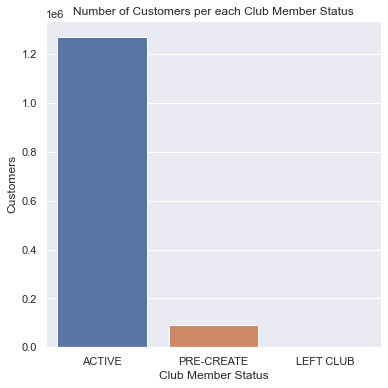

In [5]:

plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Club Member Status')
s = sb.barplot(x = 'Club Member Status', y="Customers", data=customersGroupedByClubMemberStatus)
plt.show()

#### Fashion News Frequency

We see that most customers do not fancy fashion news, only an extremely small proportion want monthly fashion news, with many abstaining from it.

In [6]:

temp = customerdata.groupby(["fashion_news_frequency"])["customer_id"].count()
tempdf = pd.DataFrame({'Fashion News Frequency': temp.index,
                   'Customers': temp.values
                  })
customersGroupedByFashionNewsFrequency = tempdf.sort_values(['Customers'], ascending=False)
customersGroupedByFashionNewsFrequency

,Fashion News Frequency,Customers
1,None,893722
2,Regularly,477416
0,Monthly,842


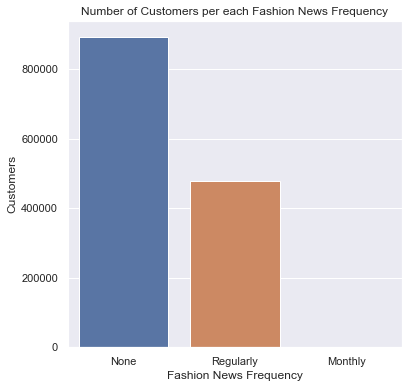

In [7]:
temp = customerdata.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({'Fashion News Frequency': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Fashion News Frequency')
s = sb.barplot(x = 'Fashion News Frequency', y="Customers", data=customersGroupedByFashionNewsFrequency)
locs, labels = plt.xticks()
plt.show()

#### Age

We see that the number of customers peak at early 20s and 50s.

In [8]:
temp = customerdata.groupby(["age"])["customer_id"].count()
tempdf = pd.DataFrame({'Age': temp.index,
                   'Customers': temp.values
                  })
customersGroupedByAgeDF = tempdf.sort_values(['Age'], ascending=True)
customersGroupedByAgeDF

,Age,Customers
0,16.0,161
1,17.0,9392
2,18.0,24323
3,19.0,37707
4,20.0,55196
...,...,...
79,95.0,10
80,96.0,3
81,97.0,4
82,98.0,7


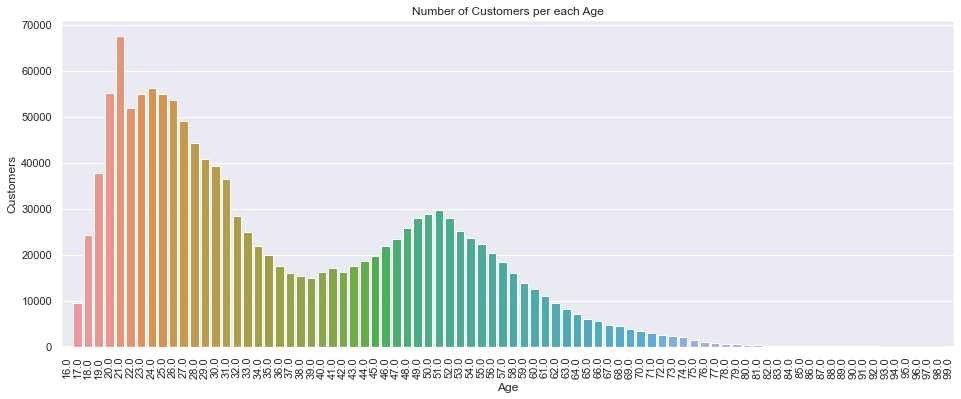

In [9]:
plt.figure(figsize = (16,6))
plt.title(f'Number of Customers per each Age')
s = sb.barplot(x = 'Age', y="Customers", data=customersGroupedByAgeDF)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
#locs, labels = plt.xticks()
plt.show()